<a href="https://colab.research.google.com/github/apoorva14-unique/Data_science_with_python.ipynb/blob/main/Task_3_clustering_analysis_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [48]:
#load the dataset
df = pd.read_csv('customers_data.csv')    #you can Replace with other dataset
print("Dataset loaded successfully!")

#Display the first few rows of the dataset
print("First 5 rows of the dataset:")
display(df.head())

#Display basic information about the dataset
print("\nDataset Info:")
print(df.info())

Dataset loaded successfully!
First 5 rows of the dataset:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None


In [49]:
#Check for missing values
print("\nMissing values in dataset:")
print(df.isnull().sum())


Missing values in dataset:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [50]:
#select relevant columns for clustering (exclude 'CUST_ID')
#for illustration, we assume columns['Region', 'Channel', 'Fresh']
features = df[['Region', 'Channel', 'Fresh']]

#standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#display the first few rows of the standardized data
print("\nFirst 5rows oof scled features:")
print(scaled_features[:5])


First 5rows oof scled features:
[[ 0.59066829  1.44865163  0.05293319]
 [ 0.59066829  1.44865163 -0.39130197]
 [ 0.59066829  1.44865163 -0.44702926]
 [ 0.59066829 -0.69029709  0.10011141]
 [ 0.59066829  1.44865163  0.84023948]]


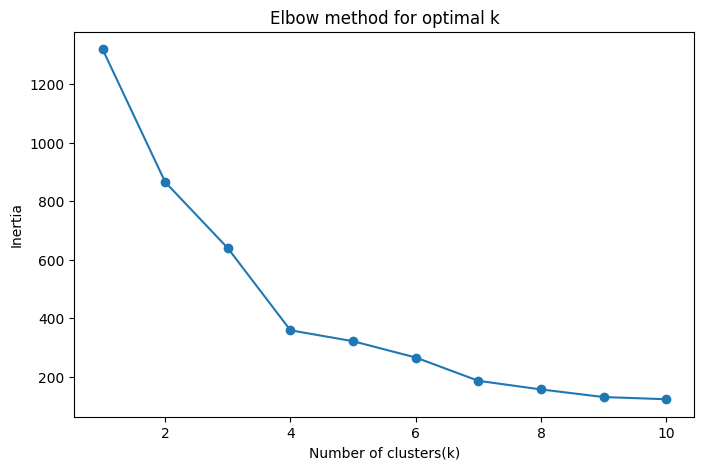

In [51]:
#Elbow method to find the optimal number of clusters
inertia = []
k_range = range(1,11)
for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(scaled_features)
  inertia.append(kmeans.inertia_)

#plot the Elbow method graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow method for optimal k')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Inertia')
plt.show()

In [52]:
#perform K-Means clustering with the optimal k(from the elbow method, assume k=3 here)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

#add cluster labels to the original dataset
df['Cluster'] = cluster_labels

#display the first few rows with cluster labels
print("\nFirst 5 rows with cluster labels:")
print(df.head())


First 5 rows with cluster labels:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Cluster  
0        1338        0  
1        1776        0  
2        7844        0  
3        1788        1  
4        5185        0  


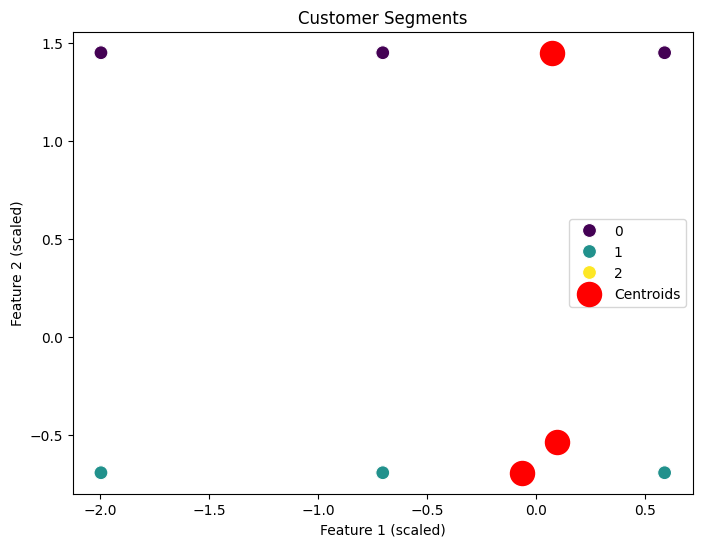

In [53]:
#visualize clusters(using the first two features for plotting)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=cluster_labels, palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.show()